# Stochastic Solver: Photo-current detection in a JC model

Copyright (C) 2011 and later, Paul D. Nation & Robert J. Johansson

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from qutip import about, destroy, fock, identity, liouvillian, mcsolve, mesolve

%matplotlib inline
rcParams["font.family"] = "STIXGeneral"
rcParams["mathtext.fontset"] = "stix"
rcParams["font.size"] = "14"

In [2]:
N = 15
w0 = 1.0 * 2 * np.pi
g = 0.2 * 2 * np.pi
times = np.linspace(0, 15, 151)
dt = times[1] - times[0]
gamma = 0.01
kappa = 0.1
ntraj = 150

In [3]:
a = destroy(N) & identity(2)
sm = identity(N) & destroy(2)

In [4]:
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (sm * a.dag() + sm.dag() * a)

In [5]:
rho0 = fock(N, 5) & fock(2, 0)

In [6]:
e_ops = [a.dag() * a, a + a.dag(), sm.dag() * sm]

### Highly efficient detection

In [7]:
c_ops = [np.sqrt(gamma) * sm]  # collapse operator for qubit
sc_ops = [np.sqrt(kappa) * a]  # stochastic collapse for resonator

In [8]:
result_ref = mesolve(H, rho0, times, c_ops + sc_ops, e_ops)

/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


In [9]:
result1 = mcsolve(
    liouvillian(H, c_ops),
    rho0,
    times,
    sc_ops,
    e_ops=e_ops,
    ntraj=1,
    options={"store_states": True},
)

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00


Total run time:   0.03s


Run the `smesolve` solver in parallel by passing the keyword argument `map_func=parallel_map`:

In [10]:
result2 = mcsolve(
    liouvillian(H, c_ops),
    rho0,
    times,
    sc_ops,
    e_ops=e_ops,
    ntraj=ntraj,
    options={"store_states": True, "map": "parallel"},
)

10.0%. Run time:   0.28s. Est. time left: 00:00:00:02


20.0%. Run time:   0.49s. Est. time left: 00:00:00:01


30.0%. Run time:   0.71s. Est. time left: 00:00:00:01


40.0%. Run time:   0.94s. Est. time left: 00:00:00:01


50.0%. Run time:   1.14s. Est. time left: 00:00:00:01


60.0%. Run time:   1.36s. Est. time left: 00:00:00:00


70.0%. Run time:   1.56s. Est. time left: 00:00:00:00


80.0%. Run time:   1.75s. Est. time left: 00:00:00:00


90.0%. Run time:   1.98s. Est. time left: 00:00:00:00


100.0%. Run time:   2.17s. Est. time left: 00:00:00:00


Total run time:   2.18s


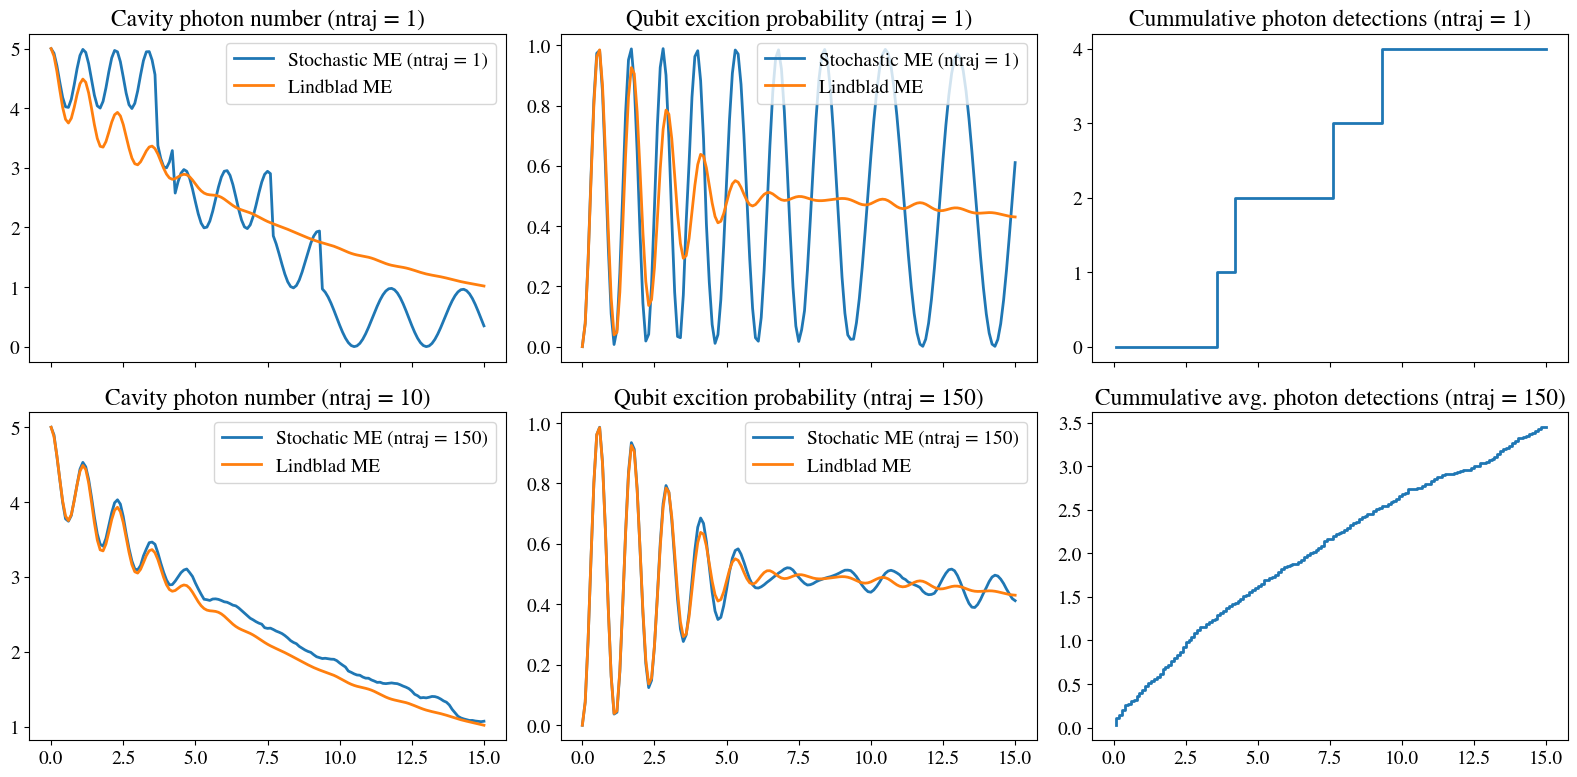

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)

axes[0, 0].plot(
    times, result1.expect[0], label=r"Stochastic ME (ntraj = 1)", lw=2
)
axes[0, 0].plot(times, result_ref.expect[0], label=r"Lindblad ME", lw=2)
axes[0, 0].set_title("Cavity photon number (ntraj = 1)")
axes[0, 0].legend()

axes[1, 0].plot(
    times, result2.expect[0], label=r"Stochatic ME (ntraj = %d)" % ntraj, lw=2
)
axes[1, 0].plot(times, result_ref.expect[0], label=r"Lindblad ME", lw=2)
axes[1, 0].set_title("Cavity photon number (ntraj = 10)")
axes[1, 0].legend()


axes[0, 1].plot(
    times, result1.expect[2], label=r"Stochastic ME (ntraj = 1)", lw=2
)
axes[0, 1].plot(times, result_ref.expect[2], label=r"Lindblad ME", lw=2)
axes[0, 1].set_title("Qubit excition probability (ntraj = 1)")
axes[0, 1].legend()

axes[1, 1].plot(
    times, result2.expect[2], label=r"Stochatic ME (ntraj = %d)" % ntraj, lw=2
)
axes[1, 1].plot(times, result_ref.expect[2], label=r"Lindblad ME", lw=2)
axes[1, 1].set_title("Qubit excition probability (ntraj = %d)" % ntraj)
axes[1, 1].legend()


axes[0, 2].step(times[1:], dt * np.cumsum(result1.photocurrent[0]), lw=2)
axes[0, 2].set_title("Cummulative photon detections (ntraj = 1)")
axes[1, 2].step(times[1:], dt * np.cumsum(result2.photocurrent[0]), lw=2)
axes[1, 2].set_title("Cummulative avg. photon detections (ntraj = %d)" % ntraj)

fig.tight_layout()

## Versions

In [12]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
